## Figure 2 - Observation of ALOS-1/2 on Shinmoe-dake and Iwo-yama

1. Run the [post-processing notebook](./post_smallbaselineApp.ipynb) to prepare data
2. Run the following to plot the figure

In [1]:
%matplotlib inline
import os
import numpy as np
from datetime import timedelta, datetime as dt
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt, ticker, dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pprint import pprint
from mintpy.defaults.plot import *
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
from mintpy.objects import timeseries
from mintpy import view, tsview, save_roipac

work_dir = os.path.expanduser('~/Papers/2020_Kirishima/figs_src/obs')
os.chdir(work_dir)
print('Go to directory:', work_dir)

dem_file = os.path.expanduser('~/data/Kirishima/DEM/gsi10m.dem.wgs84')

## Points of Interest
lalo_list = [
    [31.9131, 130.8867],  #POI for AlosDT73 at Shinmoe
    [31.9113, 130.8774],  #[31.9098, 130.8869],   #POI for Alos2DT23 at Shinmoe
    #[31.9467, 130.8524],  #POI for Alos2DT23 at Iwo for Alos2AT131
    [31.9465, 130.8531], #POI for Alos2DT23 at Iwo for Alos2DT23
    [31.9450, 130.8528],  #[31.9467, 130.8504], #POI for Alos2DT23 at Iwo for Alos2DT23 for post Dec 2017 expansion     
]

Go to directory: /Users/yunjunz/Papers/2020_Kirishima/figs_src/obs


### (a-c) Map of Vertical Displacement

In [12]:
# options for view.py
opt =  ' --dem {}  --contour-step 100 --contour-smooth 0.0 --shade-az 45 '.format(dem_file)
opt += ' -c cmy --wrap --wrap-range -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --nocbar --alpha 0.75 '
opt += ' --lalo-step 0.03 --lat-label vertical --lalo-loc 0 0 0 0 '
opt += ' --scalebar 0.2 0.13 0.04 --scalebar-pad 0.05 --noverbose '
opt += ' --sub-lat 31.895 31.955 --sub-lon 130.843 130.900 '

figsize = [2.7, 2.85]

save figure to file /Users/yunjunz/Papers/2020_Kirishima/figs_src/obs/dis_map_KirishimaPost2008Up.png


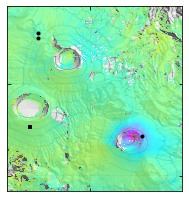

In [17]:
## ALOS-1
hv_file = os.path.expanduser('~/data/Kirishima/Model/data/KirishimaPost2008.h5')
opt2 = ' --noscalebar'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

cmd = 'view.py {f} vertical {o} {o2} '.format(f=hv_file, o=opt, o2=opt2)
data, atr, inps = view.prep_slice(cmd)
ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)

# point of interest
for lalo in [lalo_list[0]]+lalo_list[2:4]:
    ax.plot(lalo[1], lalo[0], "k.", mew=1., ms=6)
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('dis_map_KirishimaPost2008Up.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

save figure to file /Users/yunjunz/Papers/2020_Kirishima/figs_src/obs/dis_map_KirishimaPre2017Up.png


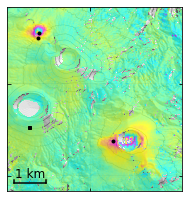

In [16]:
## ALOS-2 2015-2017
hv_file = os.path.expanduser('~/data/Kirishima/Model/data/KirishimaPre2017.h5')
opt2 = ' '
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

cmd = 'view.py {f} vertical {o} {o2} '.format(f=hv_file, o=opt, o2=opt2)
data, atr, inps = view.prep_slice(cmd)
ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)

# point of interest
for lalo in lalo_list[1:]:
    ax.plot(lalo[1], lalo[0], "k.", mew=1., ms=6)
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('dis_map_KirishimaPre2017Up.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

save figure to file /Users/yunjunz/Papers/2020_Kirishima/figs_src/obs/dis_map_KirishimaPost2017up.png


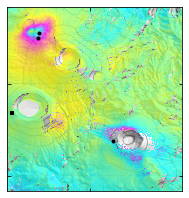

In [15]:
## ALOS-2 2017-2019
hv_file = os.path.expanduser('~/data/Kirishima/Model/data/KirishimaPost2017.h5')
opt2 = ' --noscalebar'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

cmd = 'view.py {f} vertical {o} {o2} '.format(f=hv_file, o=opt, o2=opt2)
data, atr, inps = view.prep_slice(cmd)
ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)

# point of interest
for lalo in lalo_list[1:]:
    ax.plot(lalo[1], lalo[0], "k.", mew=1., ms=6)
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('dis_map_KirishimaPost2017up.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

save figure to file /Users/yunjunz/Papers/2020_Kirishima/figs_src/obs/cbar.png


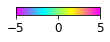

In [18]:
# colorbar
fig, cax = plt.subplots(nrows=1, ncols=1, figsize=[1.5, 0.15])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=[-5, 0, 5])
cbar.ax.tick_params(labelsize=font_size)
#cbar.set_label('vertical\ndisplacement [cm]', fontsize=font_size)
#cbar.ax.yaxis.set_label_position("left")

# output
out_file = os.path.abspath('cbar.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

### Convert velocity to displacement

In [ ]:
# inversion result for the 2017pre
inv_file_2017pre = os.path.expanduser('~/insarlab/Kirishima/Model/Shinmoe2017pre/invert_1_T/KirishimaAlos2DT23_20150209_20170918.h5')
inv_atr_2017pre = readfile.read_attribute(inv_file_2017pre)
inv_lat_2017pre = float(inv_atr_2017pre['MCTG_LAT'])
inv_lon_2017pre = float(inv_atr_2017pre['MCTG_LON'])
# inversion result for the 2008post
inv_file_2008post = os.path.expanduser('~/insarlab/Kirishima/Model/Shinmoe2008post/invert_1_2_C/ShinmoeAlosDT73_20081012_20100302.h5')
inv_atr_2008post = readfile.read_attribute(inv_file_2008post)
inv_lat_2008post = float(inv_atr_2008post['CDMN_LAT'])
inv_lon_2008post = float(inv_atr_2008post['CDMN_LON'])

## Back Ups: Interesting Displacement Time-series

### 1. Uplift of Iwo-yama after the 2017 Shinmoe-dake eruption

tsview.py timeseries_ERA5_ramp_demErr.h5 -n -1 --ylim -5 20 --lalo 31.9467 130.8504 --wrap --wrap-range -5 5 --dem inputs/gsi10m.dem.wgs84 --sub-lat 31.935 31.960 --sub-lon 130.84 130.87 --noverbose
No lookup table info range/lat found in files.


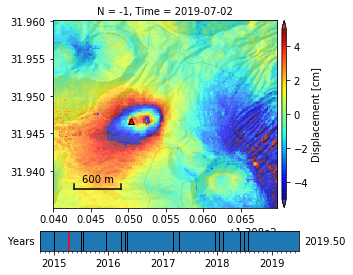

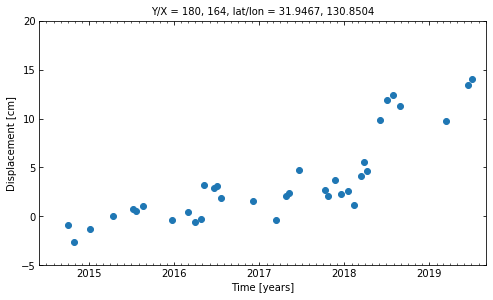

In [5]:
## ALOS-2 asc T131
os.chdir(os.path.expanduser('~/insarlab/Kirishima/KirishimaAlos2AT131/mintpyAll'))
scp_args = 'timeseries_ERA5_ramp_demErr.h5 -n -1 --ylim -5 20 --lalo 31.9467 130.8504 --wrap --wrap-range -5 5 '
scp_args += ' --dem inputs/gsi10m.dem.wgs84 --sub-lat 31.935 31.960 --sub-lon 130.84 130.87 --noverbose '
tsview.main(scp_args.split())